# Day 34: Introduction to Gradient Boosting Machines (GBM) and Extreme Gradient Boosting (XGBoost)

In this lesson, we embark on a journey through the realms of Gradient Boosting Machines (GBM) and Extreme Gradient Boosting (XGBoost), two of the most powerful and widely used machine learning algorithms in the arsenal of data scientists today. As we venture into the intricacies of these algorithms, we will uncover the principles that enable them to tackle regression and classification problems with remarkable accuracy. Our exploration will span from the foundational mathematics that drive these algorithms to practical applications that demonstrate their versatility and strength.

**Definition:**

- **Gradient Boosting Machines (GBM):** GBM is a machine learning technique used for both regression and classification problems. It builds model in a stage-wise fashion like other boosting methods, but it generalizes them by allowing optimization of an arbitrary differentiable loss function.
- **Extreme Gradient Boosting (XGBoost):** An optimized distributed gradient boosting library designed to be highly efficient, flexible, and portable. It implements machine learning algorithms under the Gradient Boosting framework, incorporating regularizations to prevent overfitting, thereby enhancing its performance.


**Understanding Gradient Boosting Machines**

Gradient Boosting Machines (GBM) powerfully combine multiple weak learning models to create a more accurate and robust predictive model. The essence of GBM lies in its ability to sequentially correct errors of the weak learners, gradually converging to a strong predictive model. In this section, we dissect the core mathematics and strategy behind GBM, setting the stage for its practical implementation and optimization in real-world scenarios.

## Definition

- **GBM Formulation**: At its core, GBM involves three key ingredients: weak learners (typically decision trees), a loss function that measures the discrepancy between the actual and predicted values, and an optimization protocol using gradient descent.
  
  Let $L(y, F(x))$ be the loss function where $y$ is the true value, and $F(x)$ is the prediction. GBM aims to find the best function $F$ that minimizes $L$ over all training data points. The process involves iteratively adding weak learners that nudge the overall model towards the minimum of $L$. Mathematically, the update rule at each step $t$ is given by:
  $$
  F_{t}(x) = F_{t-1}(x) + \rho_t h_t(x)
  $$
  where $h_t(x)$ is the weak learner added at step $t$, and $\rho_t$ is the learning rate.

- **Gradient Descent Aspects**: To minimize the loss, GBM uses gradient descent, where at each step, it moves in the direction of the negative gradient of the loss function. In practice, this means constructing a new weak learner to model the negative gradient by the data points. Therefore, each new learner $h_t(x)$ is fitted to predict the residual errors of the previous model $F_{t-1}(x)$.

## Applications

The versatility of GBM allows it to be effective across a variety of tasks:

- **Predictive Modeling**: Whether it's forecasting sales in retail, predicting stock movements in finance, or estimating game outcomes in sports analytics, GBM's ability to model complex nonlinear relationships is invaluable.
  
- **Classification Problems**: From binary decisions like spam detection to multi-class problems like identifying hand-written digits, GBM classifiers provide high accuracy by optimizing for specific loss functions (e.g., log loss for classification).


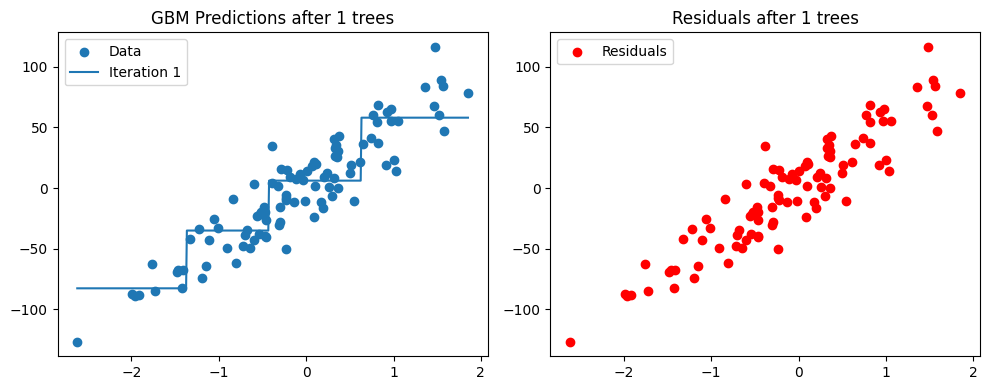

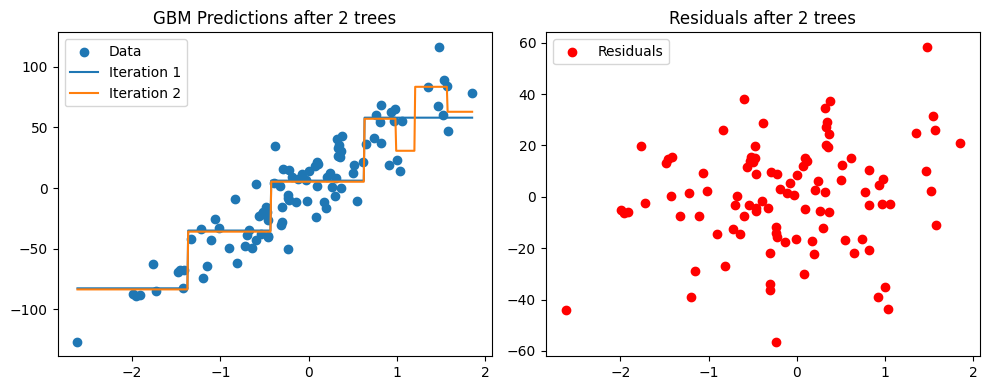

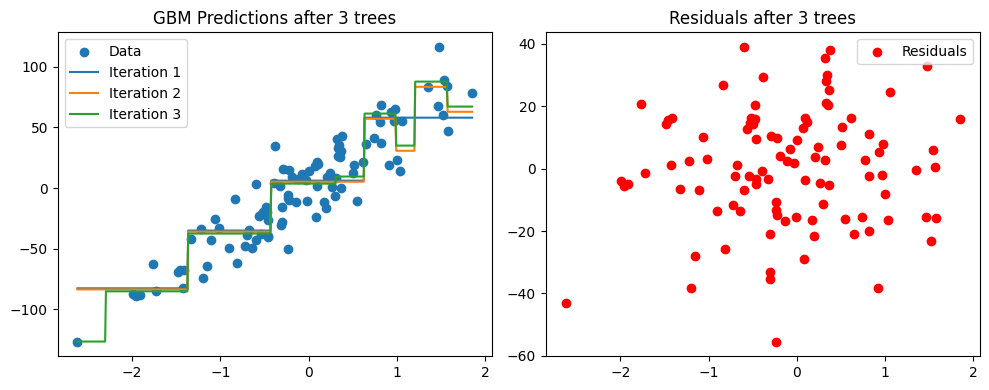

In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Data generation/loading
X, y = make_regression(n_samples=100, n_features=1, noise=20, random_state=42)
X_plot = np.linspace(X.min(), X.max(), 500)

# Initializing variables for GBM steps
n_estimators = 3  # Number of trees
y_pred = np.zeros(y.shape)  # Initial prediction is 0
trees = []
predictions = []

# Sequentially adding weak learners
for i in range(n_estimators):
    # Fit a tree to the residuals
    tree = DecisionTreeRegressor(max_depth=2)
    residuals = y - y_pred
    tree.fit(X, residuals)
    trees.append(tree)
    
    # Update the predictions
    y_pred += tree.predict(X)
    preds_plot = np.sum([tree.predict(X_plot.reshape(-1, 1)) for tree in trees], axis=0)
    predictions.append(preds_plot)
    
    # Plotting
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.scatter(X.flatten(), y, label='Data')
    for t, p in enumerate(predictions):
        plt.plot(X_plot, p, label=f'Iteration {t+1}')
    plt.title(f'GBM Predictions after {i+1} trees')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.scatter(X.flatten(), residuals, color='red', label='Residuals')
    plt.title(f'Residuals after {i+1} trees')
    plt.tight_layout()
    plt.legend()
    plt.show()

# Interpretation:
# The left plot shows the cumulative predictions of the GBM model as more trees are added. 
# Each new tree aims to correct the residuals (depicted in the right plot) left by its predecessors.
# As we iterate, the model gradually improves, fitting the data better with each addition.



# The Role of Gradient Descent in Boosting

Gradient Descent plays a pivotal role in the field of machine learning, especially within the realms of Gradient Boosting Machines (GBM) and Extreme Gradient Boosting (XGBoost). Its utility lies in the optimization of loss functions, which is fundamental to the training of models. By understanding this mechanism, one can appreciate how boosting algorithms iteratively improve model predictions through minimization of errors.

- The gradient descent algorithm is a first-order iterative optimization algorithm for finding the minimum of a function. In the context of GBM and XGBoost, it is used to minimize the loss function ($L(y, \hat{y})$), where $y$ is the true value and $\hat{y}$ is the predicted value from the model. The algorithm updates the parameters of the model in the opposite direction of the gradient of the loss function with respect to the parameters.

The process involves:
1. **Initialization:** Start with initial values for the parameters $\theta$.
2. **Gradient Computation:** Compute the gradient (partial derivatives) of the loss function with respect to the parameters, $\nabla_\theta L(y, \hat{y})$.
3. **Update Parameters:** Adjust the parameters in the direction that reduces the loss, usually with $\theta = \theta - \eta \nabla_\theta L(y, \hat{y})$, where $\eta$ is the learning rate.
4. **Iteration:** Repeat steps 2 and 3 until the loss function converges to a minimum value.

**Applications:**
- In GBM, gradient descent is utilized to find the optimal set of weights for the learners by minimizing the loss function. This includes fitting weak learners on the residual errors of the predictions.
- XGBoost builds upon GBM by introducing regularizations and an efficient tree learning algorithm. It uses a more refined version of gradient descent, which can handle sparse data and has a more flexible loss function.

Understanding the role of gradient descent provides insight into how boosting methods progressively reduce errors by focusing on difficult predictions. This foundational knowledge is crucial for customizing loss functions and tuning parameters to achieve better performance in various machine learning tasks.

Let's use the `xgboost` package to demonstrate the practical steps of training a model, including setting up a loss function, choosing a learning rate, and iteratively updating the model with gradient descent.

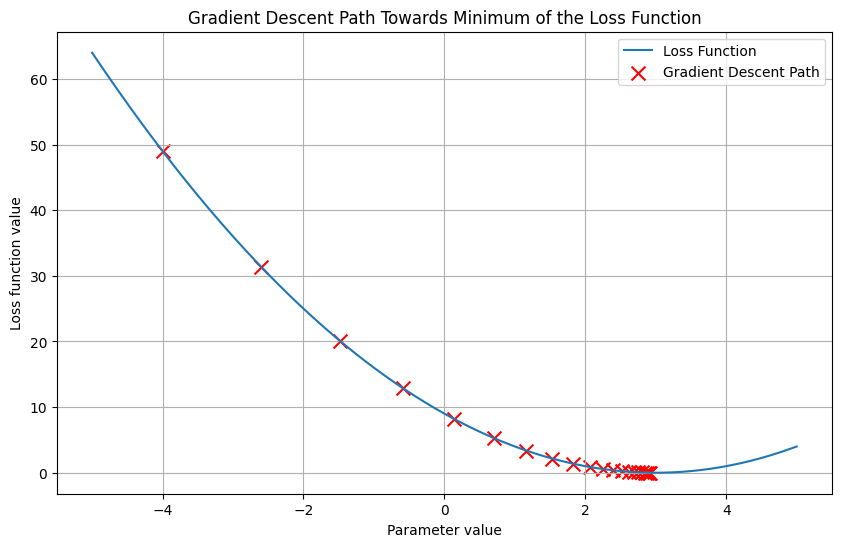

In [2]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt

# Define the loss function and its derivative
# Here, we use a simple quadratic function as an example: f(x) = (x-3)^2
def loss_function(x):
    return (x - 3)**2

def derivative_loss_function(x):
    return 2 * (x - 3)

# Gradient Descent Algorithm
def gradient_descent(starting_point, learning_rate, iterations):
    x = starting_point
    trajectory = [x]
    for _ in range(iterations):
        grad = derivative_loss_function(x)
        x = x - learning_rate * grad
        trajectory.append(x)
    return np.array(trajectory)

# Parameters for gradient descent
starting_point = -4 # Initial parameter value
learning_rate = 0.1 # Step size for each iteration
iterations = 20 # Number of iterations

# Run gradient descent
trajectory = gradient_descent(starting_point, learning_rate, iterations)

# Visualization
x_values = np.linspace(-5, 5, 500)
y_values = loss_function(x_values)
plt.figure(figsize=(10, 6))
plt.plot(x_values, y_values, label='Loss Function')
plt.scatter(trajectory, loss_function(trajectory), color='red', marker='x', s=100, label='Gradient Descent Path')
plt.title('Gradient Descent Path Towards Minimum of the Loss Function')
plt.xlabel('Parameter value')
plt.ylabel('Loss function value')
plt.legend()
plt.grid(True)
plt.show()

# Interpretation:
# This visualization demonstrates the path taken by gradient descent in minimizing the loss function.
# Starting from an initial parameter value of -4, we see the iterative updates gradually moving towards
# the minimum of the loss function at x=3. The red 'x' marks represent the trajectory of the parameter values
# as gradient descent progresses. This illustrates the essential concept of how gradient descent optimizes
# parameters to reduce loss, a fundamental process in GBM and XGBoost algorithms.



# Exploring XGBoost and Its Regularization Techniques

**Text:**  
In the realm of machine learning, one of Extreme Gradient Boosting's standout features is its built-in regularization. This lesson focuses on understanding the regularization techniques employed by XGBoost to combat overfitting, thereby ensuring that the models it creates are not only accurate but also generalizable. We will unveil how XGBoost incorporates L1 and L2 regularization into its algorithm and the mathematical principles underlying these techniques.

**Definition:**  

- **Regularization:** Regularization is a technique used to prevent overfitting by penalizing high-valued coefficients in the model. It helps to simplify the model, ensuring it performs well not just on the training data but also on unseen data. There are primarily two types of regularization:
    - **L1 Regularization (Lasso Regression):** This technique adds the absolute value of the magnitude of coefficients to the loss function. It's defined as $L1 = \lambda |w|$, where $|w|$ represents the absolute values of coefficients and $\lambda$ is the regularization strength.
    - **L2 Regularization (Ridge Regression):** This technique adds the squared magnitude of coefficients to the loss function. The L2 regularization term is given by $L2 = \lambda w^2$, where $w^2$ represents the squared values of coefficients and $\lambda$ is the regularization strength.
    
XGBoost incorporates both of these regularization techniques into its loss function, which is defined as $Obj = L + \lambda |w| + \alpha w^2$. Here, $L$ represents the traditional loss function (e.g., MSE for regression, log loss for classification), $|w|$ and $w^2$ are the L1 and L2 regularization terms respectively, and $\lambda$ and $\alpha$ are hyperparameters that control the strength of L1 and L2 regularization, respectively.

**Applications:**  

The regularization feature of XGBoost makes it highly effective in a wide range of predictive modeling tasks. Regularization helps in:
1. **Preventing Overfitting:** By keeping the model simpler and avoiding too much dependency on any single or a combination of features, thereby enhancing the model's generalizability to new data.
2. **Feature Selection (L1 Regularization):** L1 regularization can shrink some of the model's coefficients to zero, effectively performing feature selection by keeping only the most significant features in the final model.
3. **Stabilizing Predictions (L2 Regularization):** L2 regularization helps in handling multicollinearity (high correlation between predictor variables) by making the model less sensitive to small changes in the data, thus stabilizing predictions.


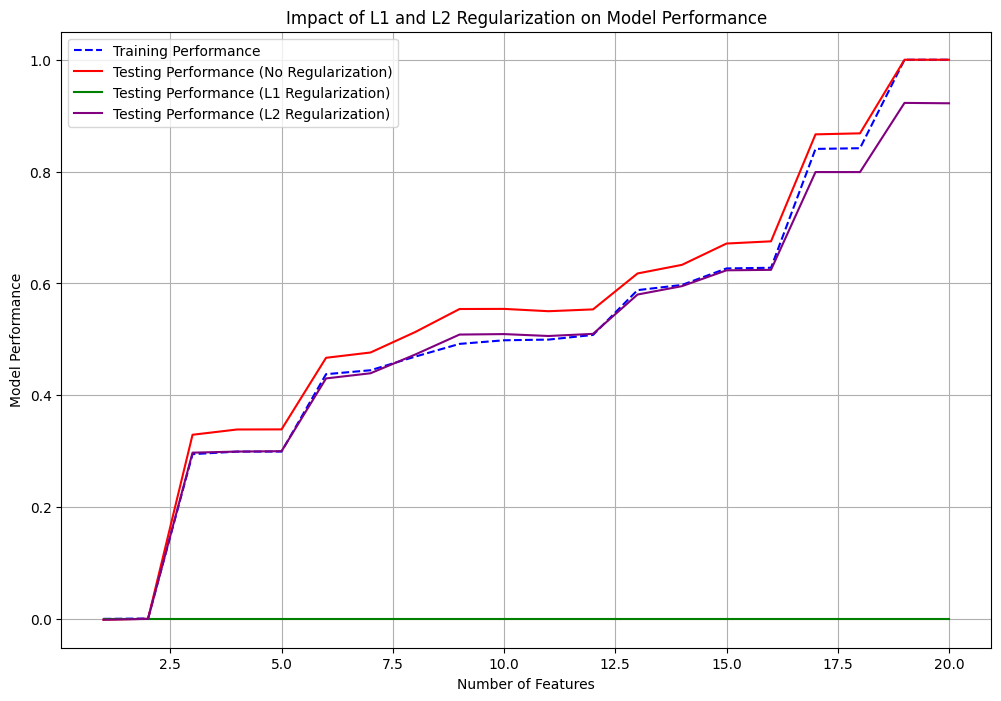

In [24]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import r2_score
import numpy as np

# Generate synthetic data with multiple features
X, y = make_regression(n_samples=2000,  # Increased number of samples
                           n_features=20,
                           effective_rank=3,
                           random_state=42)
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize arrays to store performance metrics
features_count = np.arange(1, 21)  # Assuming we increase complexity by adding features one by one
training_performance = []
testing_performance_no_reg = []
testing_performance_l1_reg = []
testing_performance_l2_reg = []

# Iterate over the number of features to simulate adding complexity
for i in features_count:
    # Use only i features
    X_train_i = X_train[:, :i]
    X_test_i = X_test[:, :i]
    
    # No Regularization
    model_no_reg = LinearRegression()
    model_no_reg.fit(X_train_i, y_train)
    training_performance.append(model_no_reg.score(X_train_i, y_train))
    testing_performance_no_reg.append(model_no_reg.score(X_test_i, y_test))
    
    # L1 Regularization (Lasso)
    model_l1 = Lasso(alpha=0.05)
    model_l1.fit(X_train_i, y_train)
    testing_performance_l1_reg.append(model_l1.score(X_test_i, y_test))
    
    # L2 Regularization (Ridge)
    model_l2 = Ridge(alpha=0.05)
    model_l2.fit(X_train_i, y_train)
    testing_performance_l2_reg.append(model_l2.score(X_test_i, y_test))

# Prepare the results for visualization
results = {
    "features_count": features_count,
    "training_performance": training_performance,
    "testing_performance_no_reg": testing_performance_no_reg,
    "testing_performance_l1_reg": testing_performance_l1_reg,
    "testing_performance_l2_reg": testing_performance_l2_reg
}

# see the data in `results` for by-feature-count scores for each model
# Visualization
plt.figure(figsize=(12, 8))
plt.plot(features_count, training_performance, label='Training Performance', color='blue', linestyle='--')
plt.plot(features_count, testing_performance_no_reg, label='Testing Performance (No Regularization)', color='red')
plt.plot(features_count, testing_performance_l1_reg, label='Testing Performance (L1 Regularization)', color='green')
plt.plot(features_count, testing_performance_l2_reg, label='Testing Performance (L2 Regularization)', color='purple')

plt.xlabel('Number of Features')
plt.ylabel('Model Performance')
plt.title('Impact of L1 and L2 Regularization on Model Performance')
plt.legend()
plt.grid(True)
plt.show()

# Exercise For The Reader

In this practical exercise, you will have the opportunity to apply the theory learned about Gradient Boosting Machines (GBM) and Extreme Gradient Boosting (XGBoost) by working on a regression problem. You will use the Boston Housing dataset, a popular dataset for regression tasks, which contains information about various housing features in the Boston suburbs, such as the average number of rooms, property tax rates, etc., along with the median value of homes. The goal is to predict the median value of homes based on these features.

## Definition: Regression Problem
A regression problem involves predicting a continuous outcome variable ($y$) based on one or more predictor variables ($X$). In the context of GBM and XGBoost, the algorithms iteratively train a series of weak models in an additive manner to minimize a continuous loss function, thereby improving the accuracy of the predictions.

### Step 1: Data Preparation 
1. **Load Dataset:** Import the Boston Housing dataset. Split it into features ($X$) and the target variable ($y$), which is the median value of homes.
2. **Split Data:** Split the dataset into a training set and a testing set using a 70:30 ratio or a similar proportion. This allows for effective model training and evaluation.

### Step 2: Model Implementation and Evaluation
1. **GBM Model:** Implement a GBM model using the training set. Utilize `sklearn`'s `GradientBoostingRegressor` as a starting point. 
2. **XGBoost Model:** Implement an XGBoost model using the training data. The `xgboost` library's `XGBRegressor` can be used here.
3. **Evaluation:** Evaluate both models on the test set using metrics suitable for regression, such as Mean Absolute Error (MAE), Mean Squared Error (MSE), or $R^2$ score. Compare the performance of the two models to understand their effectiveness in this regression task.

### Step 3: Hyperparameter Tuning and Regularization
1. **Tuning:** Experiment with different hyperparameters for each model. For GBM, you might adjust the learning rate, number of estimators, and maximum depth. For XGBoost, in addition to these, you could also tune the regularization parameters (`alpha` for L1 regularization, `lambda` for L2 regularization) to prevent overfitting.
2. **Observation:** Record how changes in hyperparameters impact the model's performance. Identify the set of parameters that yields the best results.


In [7]:
!pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.1/297.1 MB 3.7 MB/s eta 0:00:00m eta 0:00:010:00:02

[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: pip install --upgrade pip


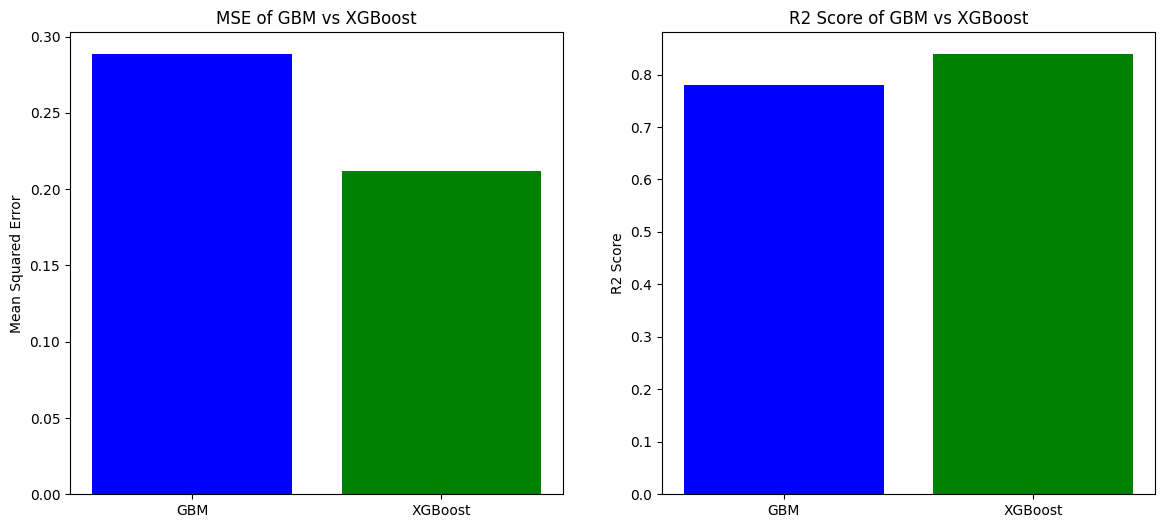

In [25]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt

# dataset removed for ethical issues
#from sklearn.datasets import load_boston

from sklearn.datasets import fetch_california_housing
    
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

# Load the Boston Housing dataset
#boston = load_boston()

housing = fetch_california_housing()
X = housing.data
y = housing.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Placeholder for models' MSE and R2 scores for plotting
models_mse = {'GBM': 0, 'XGBoost': 0}
models_r2 = {'GBM': 0, 'XGBoost': 0}

# -------- GBM Model --------
# Initialize and train the model
gbm_model = GradientBoostingRegressor(random_state=42)
gbm_model.fit(X_train, y_train)

# Predict and evaluate
gbm_predictions = gbm_model.predict(X_test)
gbm_mse = mean_squared_error(y_test, gbm_predictions)
gbm_r2 = r2_score(y_test, gbm_predictions)

# Save results for later visualization
models_mse['GBM'] = gbm_mse
models_r2['GBM'] = gbm_r2

# -------- XGBoost Model --------
# Initialize and train the model
xgb_model = XGBRegressor(random_state=42)
xgb_model.fit(X_train, y_train)

# Predict and evaluate
xgb_predictions = xgb_model.predict(X_test)
xgb_mse = mean_squared_error(y_test, xgb_predictions)
xgb_r2 = r2_score(y_test, xgb_predictions)

# Save results for later visualization
models_mse['XGBoost'] = xgb_mse
models_r2['XGBoost'] = xgb_r2

# Visualization
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# MSE comparison
ax[0].bar(models_mse.keys(), models_mse.values(), color=['blue', 'green'])
ax[0].set_title('MSE of GBM vs XGBoost')
ax[0].set_ylabel('Mean Squared Error')

# R2 score comparison
ax[1].bar(models_r2.keys(), models_r2.values(), color=['blue', 'green'])
ax[1].set_title('R2 Score of GBM vs XGBoost')
ax[1].set_ylabel('R2 Score')

plt.show()

# Interpretation
# At this stage, the visualization shows the comparison between the GBM and XGBoost models in terms of MSE and R2 score.
# Generally, lower MSE and higher R2 score indicate better performance.
# Students are encouraged to explore different hyperparameters to see how they affect the model's performance.

